Approach borrowed from:<br/>
https://www.kaggle.com/ledadel/titanic-survivorship-neural-network-model/notebook<br/>
https://www.kaggle.com/rebordao/sinking-of-the-titanic-from-data-to-insights<br/>
https://github.com/RCubo/Titanic-Keras/blob/master/titanic_keras.py<br/>
https://github.com/ikanez/kaggle-titanic

In [1]:
from __future__ import print_function

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

sns.set(style="whitegrid")

Using TensorFlow backend.


In [2]:
#loading data
train_data= pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

display(train_data.head())
display(test_data.head())
print ('train data len',len(train_data))
print ('test_data len',len(test_data))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


train data len 891
test_data len 418


In [3]:
#save PassengerId for evaluation
test_passenger_id=test_data["PassengerId"]

In [4]:
# Store the 'Survived' feature in a new variable 'outcomes' and remove it from the dataset 
# test dataset doesnt have this feature since we will be using it to test our prediction model
outcomes = train_data['Survived']
train_data = train_data.drop('Survived', axis = 1)

In [5]:
#combine all data for preprocessing
full_data = pd.concat([train_data, test_data])
print('full data length is',len(full_data))
print ('train data len is',len(train_data))
print ('test data len is',len(test_data))
display(full_data.head())
display(full_data.tail())

full data length is 1309
train data len is 891
test data len is 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


**Start Investigating Empty Data**

In [6]:
original_data= pd.read_csv("train.csv")
print(full_data.isnull().sum())
print("== Train ==")
print(train_data.isnull().sum())
print("== Test ==")
print(test_data.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
== Train ==
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
== Test ==
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


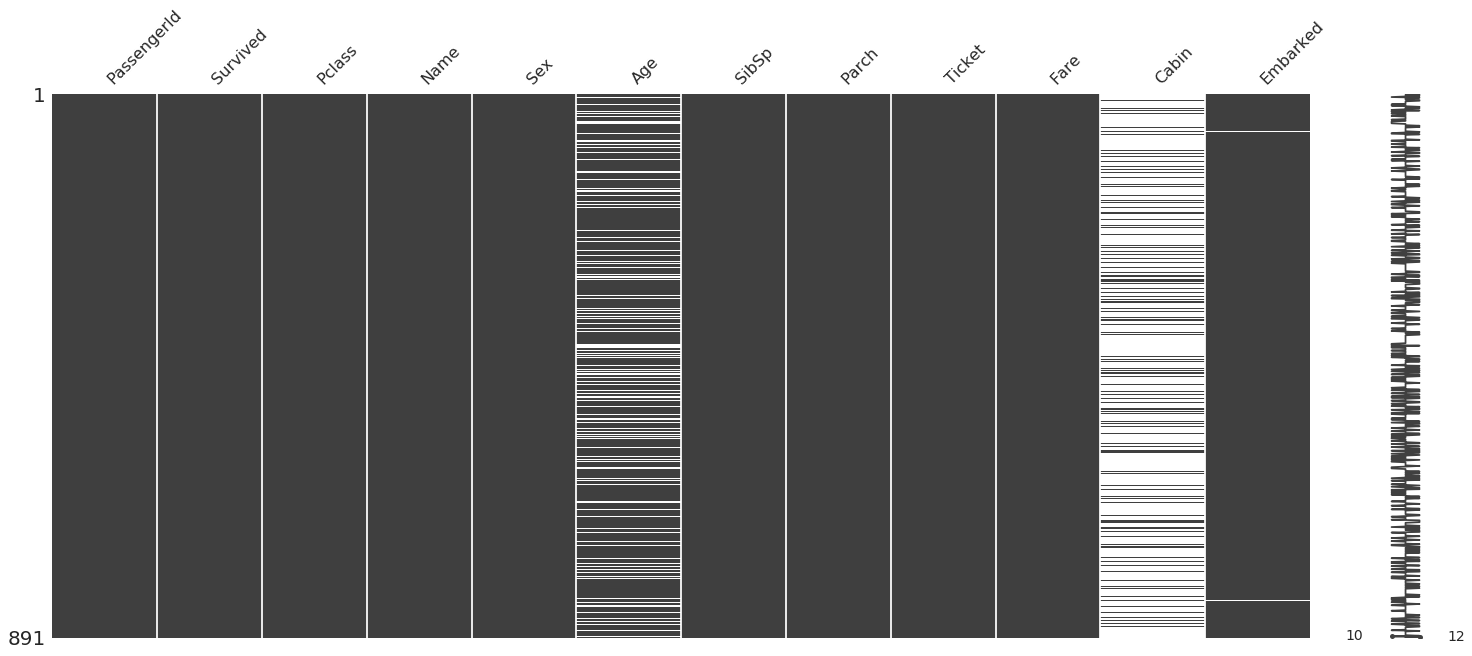

In [7]:
msno.matrix(original_data)

Missing data are well distributed with top most from Cabin, follow by Age and Embarked

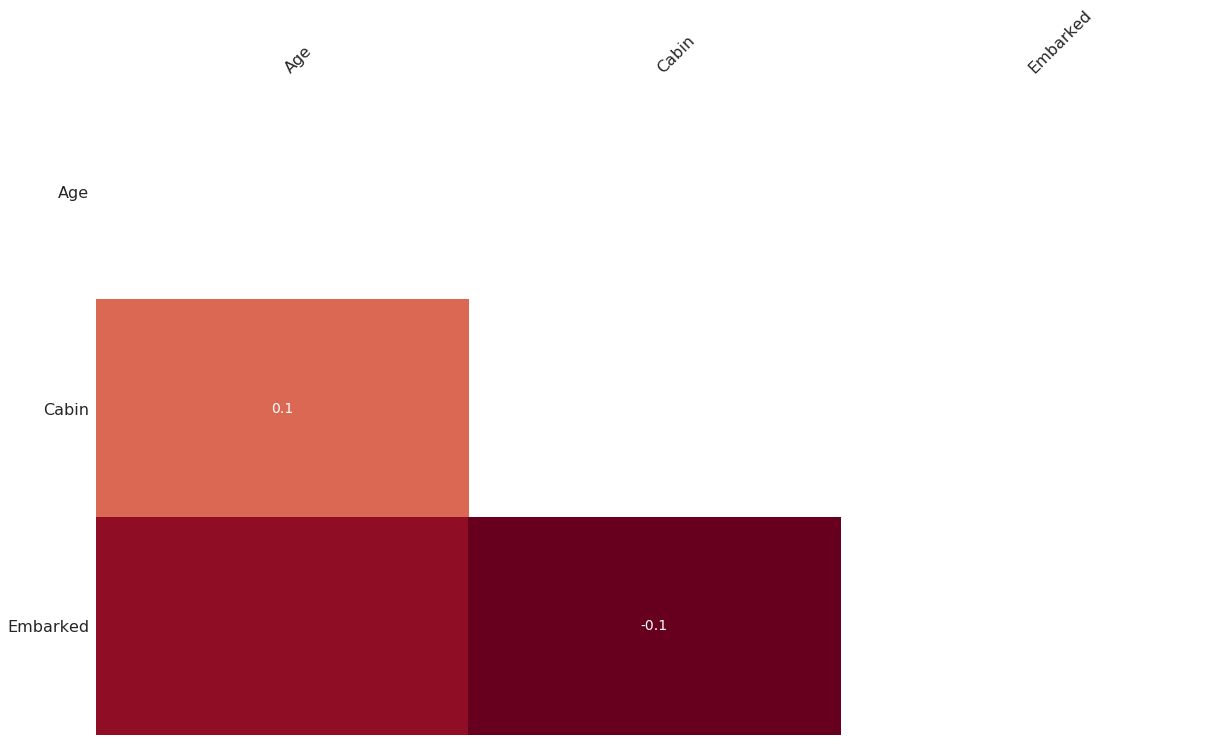

In [8]:
msno.heatmap(original_data)

Seem like there is correlation between Cabin-Age and Cabin-Embarked

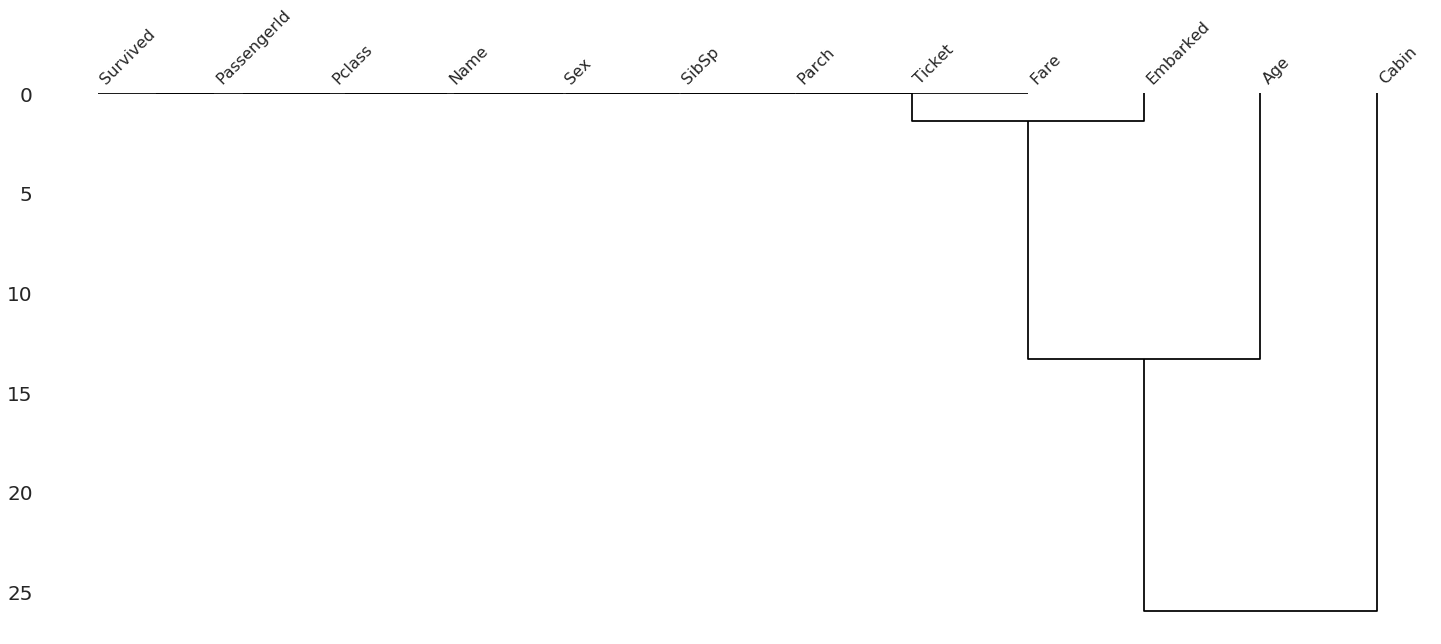

In [9]:
msno.dendrogram(original_data)

In [10]:
original_data[original_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [11]:
original_data[original_data.Ticket.str.startswith('113')].sort_values(['Ticket'],ascending=[True])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
331,332,0,1,"Partner, Mr. Austen",male,45.50,0,0,113043,28.5000,C124,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.00,0,0,113050,26.5500,B38,S
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.00,0,0,113051,27.7500,C111,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.00,0,0,113055,26.5500,E17,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.00,0,0,113059,47.1000,NaN,S
782,783,0,1,"Long, Mr. Milton Clyde",male,29.00,0,0,113501,30.0000,D6,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.00,0,2,113503,211.5000,C82,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S


Seem like no clear relationship between Ticket and Embarked, but the same ticket will emarked from the same destination

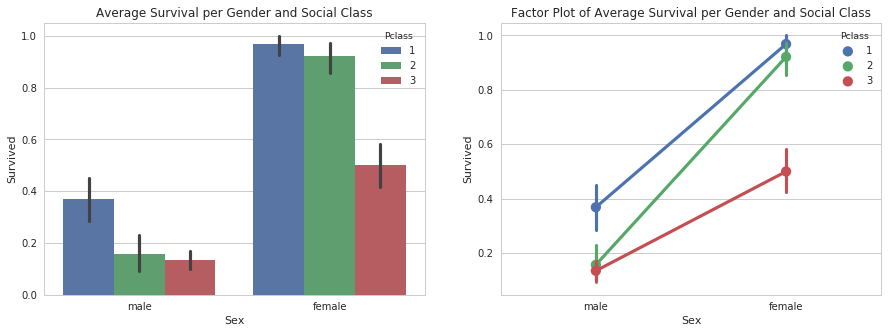

In [12]:
f, (g1, g2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=original_data, ax=g1).set_title(
    "Average Survival per Gender and Social Class");
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=original_data, ax=g2).set_title(
    "Factor Plot of Average Survival per Gender and Social Class");

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


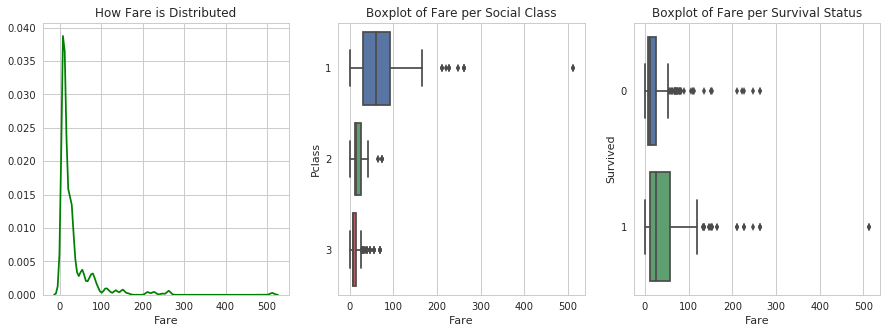

In [13]:
f, (g1, g2, g3) = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(original_data.Fare.dropna(), ax=g1, hist=False, color='g').set_title(
    "How Fare is Distributed");
sns.boxplot(x='Fare', y='Pclass', data=original_data, orient='h', ax=g2).set_title(
    "Boxplot of Fare per Social Class");
sns.boxplot(x='Fare', y='Survived', data=original_data, orient='h', ax=g3).set_title(
    "Boxplot of Fare per Survival Status");
original_data.groupby('Pclass')['Fare'].describe()

In [14]:
original_data.query("Fare > 300")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


**Cabin**

In [15]:
# Replace unknown cabin as deck x <- will will assign an value later
full_data['Cabin'].fillna('X', inplace=True)
full_data['Deck'] = full_data['Cabin'].str[0]
full_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
Deck             0
dtype: int64

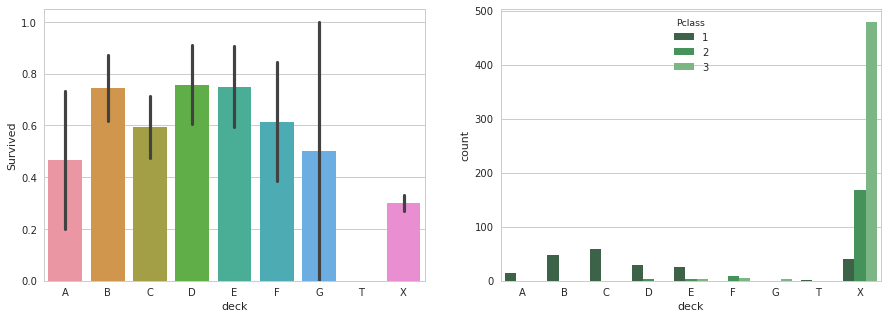

In [16]:
fillCabin = original_data['Cabin'].fillna('X')
original_data['Cabin'] = fillCabin

cabin_nnull = original_data[~original_data.Cabin.isnull()].copy()
cabin_nnull['deck'] = cabin_nnull['Cabin'].str[0]
f, (g1, g2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='deck', y='Survived', data=cabin_nnull, order=sorted(cabin_nnull.deck.unique()), ax=g1);
sns.countplot(
    x="deck", hue="Pclass", data=cabin_nnull, 
    palette="Greens_d", order=sorted(cabin_nnull.deck.unique()), ax=g2);

**Embark**

In [17]:
full_data[full_data.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


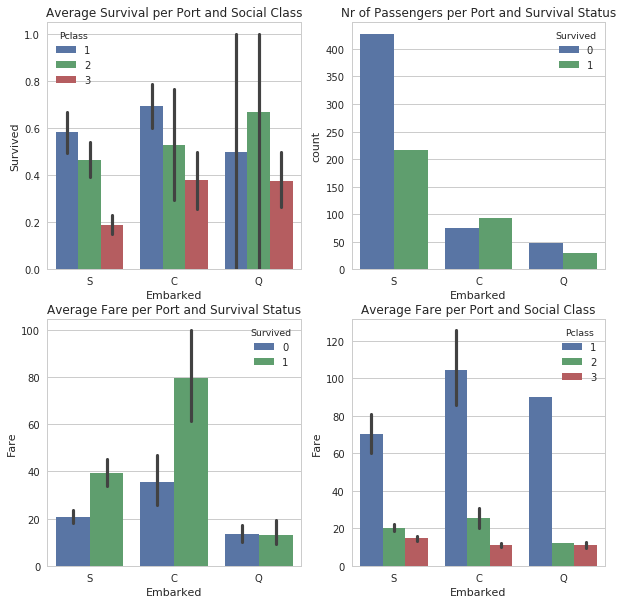

In [18]:
f, ((g1, g2), (g3, g4)) = plt.subplots(2, 2, figsize=(10,10))
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=original_data, ax=g1).set_title(
    "Average Survival per Port and Social Class");
sns.countplot(x='Embarked', hue='Survived', data=original_data, ax=g2).set_title(
    "Nr of Passengers per Port and Survival Status");
sns.barplot(x='Embarked', y='Fare', hue='Survived', data=original_data, ax=g3).set_title(
    "Average Fare per Port and Survival Status");
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=original_data, ax=g4).set_title(
    "Average Fare per Port and Social Class");

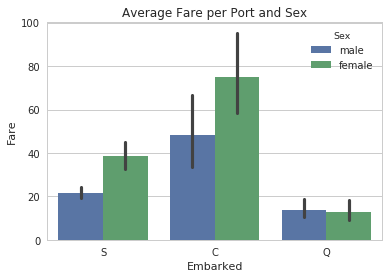

In [19]:
sns.barplot(x='Embarked', y='Fare', hue='Sex', data=original_data).set_title(
    "Average Fare per Port and Sex");

It seem like the missing Fare is coming from C

In [20]:
full_data['Embarked'].fillna('C', inplace=True)
full_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
Deck             0
dtype: int64

**Fare**

In [21]:
full_data[full_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,X,S,X


In [22]:
s_class3_average = full_data.query("Embarked == 'S' and Pclass == 3")['Fare'].describe()
display(s_class3_average)

count    494.000000
mean      14.435422
std       13.118281
min        0.000000
25%        7.854200
50%        8.050000
75%       15.900000
max       69.550000
Name: Fare, dtype: float64

In [23]:
full_data['Fare'].fillna(s_class3_average['mean'], inplace=True)
full_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Deck             0
dtype: int64

**Name**

In [24]:
full_data['Title'] = full_data.Name.apply(lambda s: s.split(',')[1].split('.')[0])
print(full_data['Title'].value_counts())

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Dr                8
 Rev               8
 Col               4
 Mlle              2
 Ms                2
 Major             2
 Mme               1
 Lady              1
 Jonkheer          1
 Don               1
 Capt              1
 Sir               1
 the Countess      1
 Dona              1
Name: Title, dtype: int64


Futher grouping<br/>
**Mlle** - The term Mademoiselle is a French familiar title, abbreviated Mlle, traditionally given to an unmarried woman. The equivalent in English is "Miss".<br/>
**Rev** - Cleric (http://www.formsofaddress.info/Reverend.html<br/>
Madam /ˈmædəm/, or, as French, **madame** /ˈmædəm/ or /məˈdɑːm/,[1] is a polite form of address for women, often contracted to ma'am /ˈmæm/. The abbreviation is "Mme" or "Mme" and the plural is mesdames (abbreviated "Mmes" or "Mmes"). The term was borrowed from the French madame (French pronunciation: ​[maˈdam]), which means "my lady".<br/>
**Dona** - Feminine form for dom (title), titled nobility in Portugal and Brazil, and in English for certain Benedictine and Carthusian monks<br/>
The word **lady** is a civil term of respect for a woman, specifically the female equivalent to gentleman, and also an English-language formal title. "Lady" is used before the surname of a woman with a title of nobility or honorary title suo jure, or the wife of a lord, a baronet, and a knight, and also before the first name of the daughter of a Duke, Marquess, or Earl.<br/>
**Jonkheer** (female equivalent: jonkvrouw) is a Dutch honorific of nobility. In Belgium, the title of Écuyer (in French) or jonkheer/jonkvrouw (in Dutch) is the lowest title within the nobility system, recognised by the Court of Cassation.<br/>
**Don** (Spanish: [don], Italian: [dɔn], Portuguese: Dom [dõ], from Latin dominus, roughly 'Lord'), abbreviated as D., is an honorific title used in Spain, Portugal, Italy, Iberoamerica, and the Philippines.
The female equivalent is Doña (Spanish: [ˈdoɲa]), Donna (Italian: [ˈdɔnna]), and Dona (Portuguese: [ˈdonɐ]), abbreviated Dª, Da., or simply D.

In [25]:
full_data['Title'] = pd.DataFrame(full_data.Name.apply(lambda s: s.split(',')[1].split('.')[0].strip(' ')).rename('title'))
changes = {
    'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss',
    'Rev': 'Priest',
    'Sir': 'Noble', 'Lady': 'Noble', 'the Countess': 'Noble', 'Jonkheer': 'Noble', 'Don': 'Noble', 'Dona': 'Noble',
    'Major': 'Military', 'Capt': 'Military', 'Col': 'Military'}
full_data['Title'].replace(changes, inplace=True)
print(full_data.Title.value_counts())

Mr          757
Miss        264
Mrs         198
Master       61
Dr            8
Priest        8
Military      7
Noble         6
Name: Title, dtype: int64


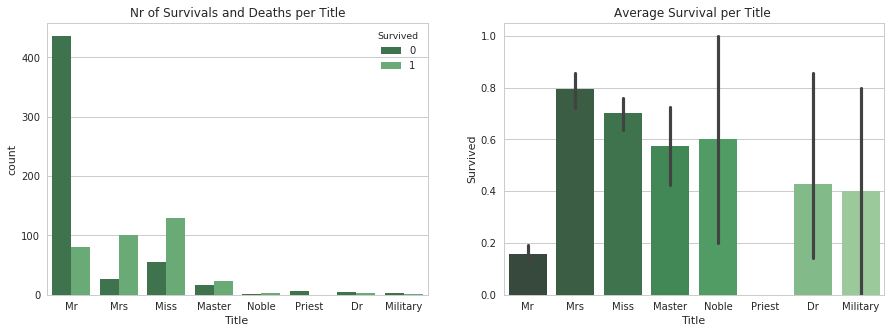

In [26]:
original_data['Title'] = pd.DataFrame(original_data.Name.apply(lambda s: s.split(',')[1].split('.')[0].strip(' ')).rename('title'))
changes = {
    'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss',
    'Rev': 'Priest',
    'Sir': 'Noble', 'Lady': 'Noble', 'the Countess': 'Noble', 'Jonkheer': 'Noble', 'Don': 'Noble', 'Dona': 'Noble',
    'Major': 'Military', 'Capt': 'Military', 'Col': 'Military'}
original_data['Title'].replace(changes, inplace=True)
f, (g1, g2) = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='Title', hue='Survived', data=original_data, palette="Greens_d", ax=g1).set_title(
    'Nr of Survivals and Deaths per Title');
sns.barplot(x='Title', y='Survived', data=original_data, palette="Greens_d", ax=g2).set_title(
    "Average Survival per Title ");

**Age**

Using LinearRegression to predict Age

In [27]:
before_age_predict = full_data.copy()
predictors = ['Fare', 'Parch', 'Pclass', 'SibSp', 'Age']
age_train = full_data.loc[~full_data.Age.isnull(), predictors]
age_test = full_data.loc[full_data.Age.isnull(), predictors]
lm = LinearRegression()
lm.fit(age_train.drop('Age', axis=1), age_train['Age'], )
predicted_age = lm.predict(age_test.drop('Age', axis=1))
full_data.loc[full_data.Age.isnull(), 'Age'] = predicted_age
full_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
Title          0
dtype: int64

/home/chc/.conda/envs/tf-gpu/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/chc/.conda/envs/tf-gpu/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


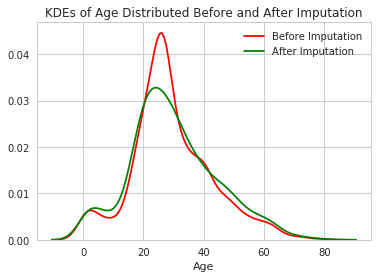

In [28]:
sns.distplot(full_data.Age.dropna(), hist=False, color='r', label='Before Imputation');
sns.distplot(before_age_predict.Age, hist=False, color='g', label='After Imputation').set_title(
    "KDEs of Age Distributed Before and After Imputation");

**Start to convert features to be numbers**

In [29]:
full_data['Sex'] = full_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
full_data['Title'] = full_data['Title'].map( {'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Priest':4,'Dr':5,'Military':6,'Noble':7} ).astype(int)
full_data['Deck'] = full_data['Deck'].map( {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7,'X':8} ).astype(int)
full_data['Embarked'] = full_data['Embarked'].map( {'S':0,'C':1,'Q':2} ).astype(int)
display(full_data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Title
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,X,0,8,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,2,2
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,X,0,8,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,2,2
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,X,0,8,0


Trim not relevant data - we going to have 8 features to train, dropping Cabin/Deck as quite a lot of missing data

In [30]:
#trim_data = full_data.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
trim_data = full_data.drop(['PassengerId','Name','Ticket','Cabin','Deck'],axis = 1)
display(trim_data.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,2
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,2
4,3,1,35.0,0,0,8.0500,0,0


In [31]:
#splitting data back to train and test set
train_data=trim_data[:891]
test_data=trim_data[891:]
print ('train_data len',len(train_data))
print ('test_data len',len(test_data))

train_data len 891
test_data len 418


**Start DNN Training using keras**

In [36]:
def build_model():
    # This resets all parameters and variables
    tf.reset_default_graph()
    #Define the ANN
    annModel = Sequential() #Sequential ANN

    #Layers of the ANN (Dense in this case)
    annModel.add(Dense(30, input_dim=8, activation='sigmoid'))
    annModel.add(Dense(8, input_dim=30, activation='sigmoid'))
    annModel.add(Dense(1, input_dim=8, activation='sigmoid'))
    annModel.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
    return annModel

In [37]:
#Build the model and saving as a variable 'model'
model = build_model()

In [38]:
train_data=np.array(train_data)
labels_data=np.array(outcomes)

In [39]:
model.fit(train_data, labels_data,
              validation_split=0.2,
              batch_size=32,
              nb_epoch=300,
              shuffle=True)

/home/chc/.conda/envs/tf-gpu/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 712 samples, validate on 179 samples
Epoch 1/300
712/712 [==============================] - 1s - loss: 0.7320 - acc: 0.3904 - val_loss: 0.6948 - val_acc: 0.3631
Epoch 2/300
712/712 [==============================] - 0s - loss: 0.6785 - acc: 0.5983 - val_loss: 0.6510 - val_acc: 0.7207
Epoch 3/300
712/712 [==============================] - 0s - loss: 0.6546 - acc: 0.6657 - val_loss: 0.6284 - val_acc: 0.7207
Epoch 4/300
712/712 [==============================] - 0s - loss: 0.6422 - acc: 0.6685 - val_loss: 0.6146 - val_acc: 0.7151
Epoch 5/300
712/712 [==============================] - 0s - loss: 0.6351 - acc: 0.6784 - val_loss: 0.6039 - val_acc: 0.7263
Epoch 6/300
712/712 [==============================] - 0s - loss: 0.6283 - acc: 0.6756 - val_loss: 0.5951 - val_acc: 0.7207
Epoch 7/300
712/712 [==============================] - 0s - loss: 0.6231 - acc: 0.6784 - val_loss: 0.5891 - val_acc: 0.7318
Epoch 8/300
712/712 [==============================] - 0s - loss: 0.6189 - acc: 0.6728

712/712 [==============================] - 0s - loss: 0.4526 - acc: 0.8146 - val_loss: 0.3961 - val_acc: 0.8436
Epoch 67/300
712/712 [==============================] - 0s - loss: 0.4520 - acc: 0.8132 - val_loss: 0.3934 - val_acc: 0.8492
Epoch 68/300
712/712 [==============================] - 0s - loss: 0.4515 - acc: 0.8146 - val_loss: 0.3978 - val_acc: 0.8492
Epoch 69/300
712/712 [==============================] - 0s - loss: 0.4500 - acc: 0.8160 - val_loss: 0.3948 - val_acc: 0.8380
Epoch 70/300
712/712 [==============================] - 0s - loss: 0.4501 - acc: 0.8104 - val_loss: 0.3929 - val_acc: 0.8492
Epoch 71/300
712/712 [==============================] - 0s - loss: 0.4508 - acc: 0.8118 - val_loss: 0.3901 - val_acc: 0.8436
Epoch 72/300
712/712 [==============================] - 0s - loss: 0.4479 - acc: 0.8104 - val_loss: 0.3927 - val_acc: 0.8268
Epoch 73/300
712/712 [==============================] - 0s - loss: 0.4478 - acc: 0.8202 - val_loss: 0.3897 - val_acc: 0.8492
Epoch 74/300


712/712 [==============================] - 0s - loss: 0.4287 - acc: 0.8287 - val_loss: 0.3651 - val_acc: 0.8603
Epoch 132/300
712/712 [==============================] - 0s - loss: 0.4293 - acc: 0.8244 - val_loss: 0.3633 - val_acc: 0.8436
Epoch 133/300
712/712 [==============================] - 0s - loss: 0.4295 - acc: 0.8301 - val_loss: 0.3647 - val_acc: 0.8436
Epoch 134/300
712/712 [==============================] - 0s - loss: 0.4296 - acc: 0.8258 - val_loss: 0.3612 - val_acc: 0.8603
Epoch 135/300
712/712 [==============================] - 0s - loss: 0.4287 - acc: 0.8272 - val_loss: 0.3685 - val_acc: 0.8380
Epoch 136/300
712/712 [==============================] - 0s - loss: 0.4287 - acc: 0.8287 - val_loss: 0.3631 - val_acc: 0.8547
Epoch 137/300
712/712 [==============================] - 0s - loss: 0.4285 - acc: 0.8230 - val_loss: 0.3617 - val_acc: 0.8547
Epoch 138/300
712/712 [==============================] - 0s - loss: 0.4297 - acc: 0.8258 - val_loss: 0.3670 - val_acc: 0.8380
Epoch 

712/712 [==============================] - 0s - loss: 0.4186 - acc: 0.8301 - val_loss: 0.3518 - val_acc: 0.8603
Epoch 197/300
712/712 [==============================] - 0s - loss: 0.4179 - acc: 0.8329 - val_loss: 0.3523 - val_acc: 0.8492
Epoch 198/300
712/712 [==============================] - 0s - loss: 0.4156 - acc: 0.8371 - val_loss: 0.3567 - val_acc: 0.8603
Epoch 199/300
712/712 [==============================] - 0s - loss: 0.4195 - acc: 0.8287 - val_loss: 0.3540 - val_acc: 0.8547
Epoch 200/300
712/712 [==============================] - 0s - loss: 0.4185 - acc: 0.8301 - val_loss: 0.3493 - val_acc: 0.8547
Epoch 201/300
712/712 [==============================] - 0s - loss: 0.4171 - acc: 0.8385 - val_loss: 0.3489 - val_acc: 0.8547
Epoch 202/300
712/712 [==============================] - 0s - loss: 0.4194 - acc: 0.8315 - val_loss: 0.3482 - val_acc: 0.8547
Epoch 203/300
712/712 [==============================] - 0s - loss: 0.4166 - acc: 0.8385 - val_loss: 0.3536 - val_acc: 0.8492
Epoch 

712/712 [==============================] - 0s - loss: 0.4101 - acc: 0.8357 - val_loss: 0.3535 - val_acc: 0.8547
Epoch 262/300
712/712 [==============================] - 0s - loss: 0.4113 - acc: 0.8301 - val_loss: 0.3487 - val_acc: 0.8603
Epoch 263/300
712/712 [==============================] - 0s - loss: 0.4090 - acc: 0.8427 - val_loss: 0.3467 - val_acc: 0.8492
Epoch 264/300
712/712 [==============================] - 0s - loss: 0.4091 - acc: 0.8385 - val_loss: 0.3546 - val_acc: 0.8547
Epoch 265/300
712/712 [==============================] - 0s - loss: 0.4095 - acc: 0.8244 - val_loss: 0.3466 - val_acc: 0.8547
Epoch 266/300
712/712 [==============================] - 0s - loss: 0.4086 - acc: 0.8301 - val_loss: 0.3490 - val_acc: 0.8492
Epoch 267/300
712/712 [==============================] - 0s - loss: 0.4089 - acc: 0.8329 - val_loss: 0.3458 - val_acc: 0.8492
Epoch 268/300
712/712 [==============================] - 0s - loss: 0.4094 - acc: 0.8399 - val_loss: 0.3600 - val_acc: 0.8492
Epoch 

In [48]:
predictions = model.predict_classes(np.array(test_data))

passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=predictions
evaluation[:10]

 32/418 [=>............................] - ETA: 0s

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [49]:
# Write the solution to file
evaluation.to_csv("chc_submission.csv",index=False)